# Exploring Data with ONE


### Example 1: Characterising the reaction time of the subject in a session

In this example we show how to

1.   Load in trials data for a particular session using `one.load_object`
2.   Explore the trials object
3.   Compute the reaction time for each trial in the session
4.   Compute whether there are differences in reaction time depending on trial type (left vs right stimulus, correct vs incorrect trial)
5.   Plot the reaction time across the duration of the session

In [2]:
! pip install ONE-api
! pip install ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.9/237.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 14.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━

In [4]:
from one.api import ONE
import numpy as np

ONE.setup(base_url = 'https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"
Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/tmpbrt9ezjp/cache.zip Bytes: 11816964


100%|██████████| 11.269535064697266/11.269535064697266 [00:00<00:00, 17.91it/s]


In [5]:
# Load in trials data

eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')

/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 50.4k/50.4k [00:00<00:00, 162kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.99k/4.99k [00:00<00:00, 25.2kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.99k/4.99k [00:00<00:00, 25.0kB/s]


In [8]:
# Explore the trials object
import pandas as pd

trials_df = trials.to_df()   # can't convert to df with pandas due to shape of trials

from IPython.display import display
display(trials_df)

,stimOff_times,goCueTrigger_times,choice,contrastLeft,stimOn_times,response_times,goCue_times,firstMovement_times,probabilityLeft,contrastRight,feedbackType,rewardVolume,feedback_times,intervals_0,intervals_1
0,15.867546,14.145882,-1.0,NaN,14.145685,14.800484,14.146585,14.479997,0.5,1.000,1.0,1.5,14.800586,10.969770,16.367592
1,19.617038,18.296189,1.0,0.2500,18.296037,18.552188,18.296837,18.437997,0.5,NaN,1.0,1.5,18.552278,16.748692,20.117087
2,22.462120,20.979787,-1.0,NaN,20.979602,21.396189,20.980468,21.110997,0.5,0.250,1.0,1.5,21.396293,20.487884,22.962199
3,25.212778,23.834504,-1.0,NaN,23.834316,24.152707,23.835416,24.047997,0.5,0.125,1.0,1.5,24.152818,23.336199,25.712823
4,28.034496,26.650927,-1.0,NaN,26.650735,26.963229,26.651735,26.735997,0.5,0.250,1.0,1.5,26.963303,26.085824,28.534539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2883.413596,2881.596802,-1.0,NaN,2881.596645,2882.352307,2881.597778,2882.013997,0.2,0.000,1.0,1.5,2882.352403,2881.060798,2883.913720
604,2888.246880,2885.685226,-1.0,0.0625,2885.685069,2886.185928,2885.686069,2885.973997,0.2,NaN,-1.0,0.0,2886.186719,2884.817523,2888.746939
605,2891.918113,2890.201343,-1.0,NaN,2890.201184,2890.846547,2890.201984,2890.420997,0.2,0.250,1.0,1.5,2890.846653,2889.643640,2892.418160
606,2950.578646,2894.046465,1.0,0.1250,2894.046333,2949.519476,2894.047266,2894.367997,0.2,NaN,1.0,1.5,2949.519585,2893.415063,2951.078685


In [13]:
# Compute reaction time - time between visual stimulus time and response time

reaction_time = trials['response_times'] - trials['stimOn_times']

In [14]:
# Compute whether there are differences in reaction time depending on trial type (left vs right stimulus, correct vs incorrect trial)

left_trial_idx = ~np.isnan(trials['contrastLeft'])  # find non null entries in contrastLeft to prevent errors
right_trial_idx = ~np.isnan(trials['contrastRight']) # find non null entries in contrastRight to prevent erros
left_reaction_time = np.mean(reaction_time[left_trial_idx])  # find the mean left reaction time
right_reaction_time = np.mean(reaction_time[right_trial_idx]) # find the mean right reaction time

print(f'Average reaction time for stimulus on Left: {left_reaction_time}')
print(f'Average reaction time for stimulus on Left: {right_reaction_time}')

Average reaction time for stimulus on Left: 2.6305362305886573
Average reaction time for stimulus on Left: 1.0581783527741766


In [18]:
correct_trial_idx = trials['feedbackType'] == 1
incorrect_trial_idx = trials['feedbackType'] == -1
correct_reaction_time = np.mean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.mean(reaction_time[incorrect_trial_idx])
print(f'Average reaction time for trials that were Correct: {correct_reaction_time}')
print(f'Average reaction time for trials that were Correct: {incorrect_reaction_time}')

Average reaction time for trials that were Correct: 0.9801639861488436
Average reaction time for trials that were Correct: 5.3063314715867325


Text(0, 0.5, 'Reaction time (s)')

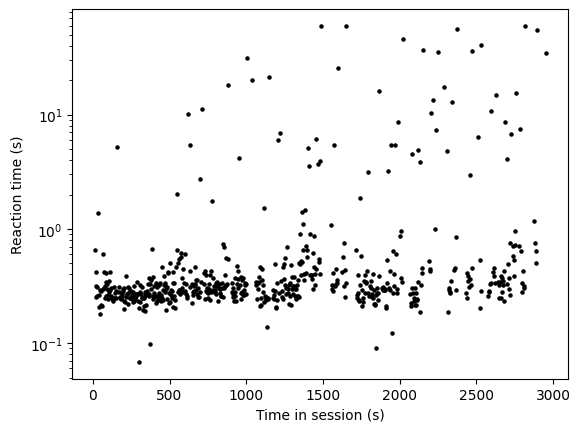

In [32]:
# Make a plot of reaction time across session
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(trials['stimOn_times'], reaction_time, c='k', s=5)
ax.set_yscale("log")
ax.set_xlabel("Time in session (s)")
ax.set_ylabel("Reaction time (s)")

In [27]:
trials['response_times'].shape

(608,)

Text(0, 0.5, 'Response times (s)')

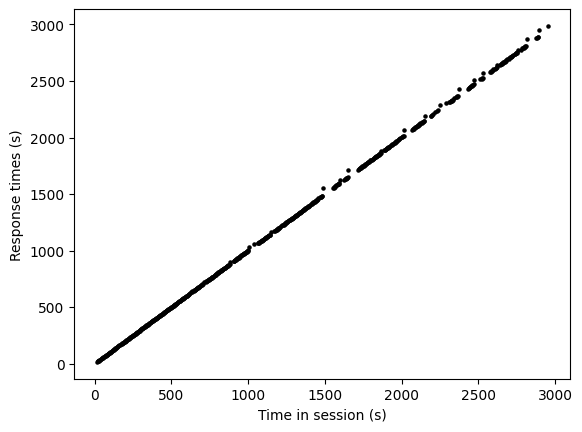

In [33]:
# Make a plot of response time across session
fig, ax = plt.subplots()
ax.scatter(trials['stimOn_times'], trials['response_times'] , c='k', s=5)
# ax.set_yscale("log")
ax.set_xlabel("Time in session (s)")
ax.set_ylabel("Response times (s)")

In [35]:
one.describe_dataset('trials.table')

A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times


{'id': 'c634bb4d-a152-4e6f-930d-516957b433e6',
 'name': 'trials.table',
 'created_by': None,
 'description': 'A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times',
 'filename_pattern': '*trials.table*'}

In [38]:
trials['stimOn_times'][:10], trials['response_times'][:10]

(array([14.14568529, 18.29603688, 20.97960183, 23.83431633, 26.65073466,
        29.57914179, 32.71726128, 37.74515844, 40.46212005, 45.06199335]),
 array([14.8004842 , 18.55218811, 21.39618917, 24.15270691, 26.96322884,
        29.83913369, 34.08854043, 38.00966589, 40.66747235, 45.24167646]))

From the [documentation](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.5jzoc59sqvj7), response_times is the time at which a reponse was recorded. This marks the time a response was recorded and stimOn_times is the time at which the visual stimulus appears on the screen. The linear correlation here may be due to the following

The time between the response time and the stimuOn time are almost similar, with just slight variations. From a high level, the subject does not spend a lot of time to respond to a stimuli. This can be seen by visualizing the plot of reaction time across session above with a normal y-axis scale. Changes from this behaviour are not prominent aside the view cases show in the plot of reaction time across session

### 🏠 Example 2: Characterising the electrophysiology data of a single insertion

In this example we show how to

1.   Load in spikesorting data for a single insertion data
2.   Evaluate the number of good clusters
3.   Find the location of good clusters in the brain
4.   Compute the firing rate of each cluster
5.   Plot the firing rate of good clusters alongside their brain location



In [40]:
from brainbox.io.one import SpikeSortingLoader
from one.api import ONE
from ibllib.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '695476f6-4c14-4a2f-b658-948514629079'

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.depths.npy: 100%|██████████| 91.9M/91.9M [00:01<00:00, 74.1MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.clusters.npy: 100%|██████████| 46.0M/46.0M [00:00<00:00, 88.0MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.times.npy: 100%|██████████| 91.9M/91.9M [00:00<00:00, 103MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.amps.npy: 100%|██████████| 91.9M/91.9M [00:00<00:00, 105MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/clusters.uuids.csv: 100%|██████████| 14.2k/14.2k [00:00<00:00, 70.7kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/

In [42]:
# Evaluate the number of good clusters

good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

Total no. of clusters: (383,)
Number of good clusters: (55,)


In [43]:
# Find the location of clusters in the brain

acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

RT: 1
SSp-bfd2/3: 4
SSp-bfd4: 14
SSp-bfd5: 1
SSp-bfd6a: 7
VPL: 28


In [45]:
# The firing rate for each cluster can be found in the attributes however it will also be manually calcualed form the data
firing_rate = clusters_good['firing_rate']

# compute the number of spikes detected for each cluster
n_spikes = np.empty((clusters_good['cluster_id'].shape))

for i, c in enumerate(clusters_good['cluster_id']):
  # find the location where each cluster id is found in the spikes objects and get the sum
  cidx = np.sum(spikes['clusters'] == c)
  n_spikes[i] = cidx

# To compute the firing rate we can divide the spike count by the total duration of the recording
duration = np.max(spikes['times']) - np.min(spikes['times'])
firing_rate_from_spikes = n_spikes / duration

# Check to be sure that the values are equal
np.array_equal(firing_rate_from_spikes, firing_rate)

True

<ipython-input-47-6fc7e00fc6ef>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
<ipython-input-47-6fc7e00fc6ef>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))


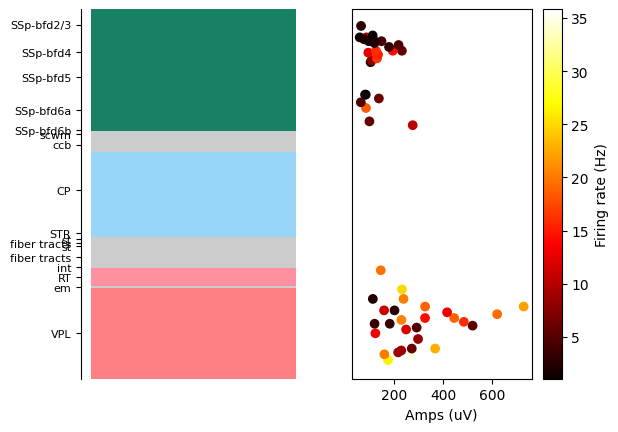

In [47]:
# Plot the firing rate of good clusters against their brain locations

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from brainbox.ephys_plots import plot_brain_regions

norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)

fig, axs = plt.subplots(1, 2)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])

# Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
# Map firing rate values to colours
norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)
axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
axs[1].set_xlabel('Amps (uV)')
axs[1].get_yaxis().set_visible(False)
# Add colorbar
cbar = fig.colorbar(mapper, ax=axs[1])
cbar.set_label('Firing rate (Hz)')

### Example 3: Characterising event aligned activity of a single cluster

In this example we will show how to


1.   Load in trials data for a single session and spikesorting data for a single insertion
2.   Get spikes for chosen cluster
3.   Compute and plot firing rate of cluster around trial event
4.   Compute and plot peristimulus time histograms for different trial conditions (left vs right, correct vs incorrect)



In [48]:
# Load in trials data and spikesorting data
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from one.api import ONE
from ibllib.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '695476f6-4c14-4a2f-b658-948514629079'
eid, _ = one.pid2eid(pid)

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

In [49]:
# Get spikes for a single cluster
# Get the 25th good cluster
cluster_id = clusters['cluster_id'][clusters['label'] == 1][25]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

/usr/local/lib/python3.10/dist-packages/brainbox/singlecell.py:48: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ts = np.repeat(align_times[:, np.newaxis], tscale.size, axis=1) + tscale


Text(0, 0.5, 'Trial number')

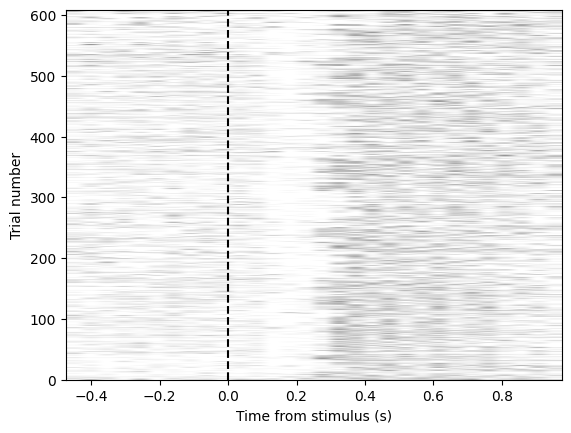

In [50]:
# Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = sl.trials['stimOn_times']

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.0bb5s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 0.5
post_time = 1
spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

Text(0.5, 0, 'Time from stimulus (s)')

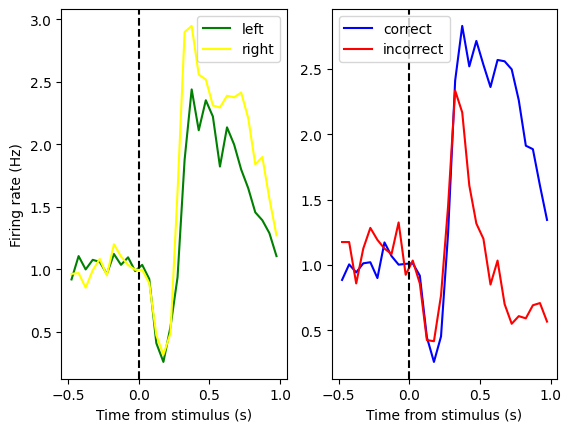

In [52]:
# Compute peri stimulus time histogram for different trial events
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2)
axs[0].plot(times, psth_left, c='green')
axs[0].plot(times, psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')

axs[1].plot(times, psth_correct, c='blue')
axs[1].plot(times, psth_incorrect, c='red')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')

### 🏠 Example 4: Characterising event aligned activity of wheel velocity and paw position


In this example we will show how to


1.   Load in trials, wheel and pose data using SessionLoader
2.   Smoothing the wheel trace
3.   Plot the paw trace for a given trial
4.   Compute and plot the average wheel and paw trace for all trials

In [53]:
# Load trials, wheel and pose data
from brainbox.io.one import SessionLoader
from one.api import ONE
import numpy as np

one = ONE()
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
sl.load_wheel()
sl.load_pose()


/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_wheel.position.npy: 100%|██████████| 7.87M/7.87M [00:02<00:00, 3.90MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 7.87M/7.87M [00:01<00:00, 7.83MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_leftCamera.dlc.pqt: 100%|██████████| 40.1M/40.1M [00:01<00:00, 35.6MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_leftCamera.times.npy: 100%|██████████| 2.10M/2.10M [00:00<00:00, 9.50MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_rightCamera.dlc.pqt: 100%|██████████| 89.4M/89.4M [00:01<00:00, 74.0MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_rightCamera.times.

Text(0, 0.5, 'Acceleration')

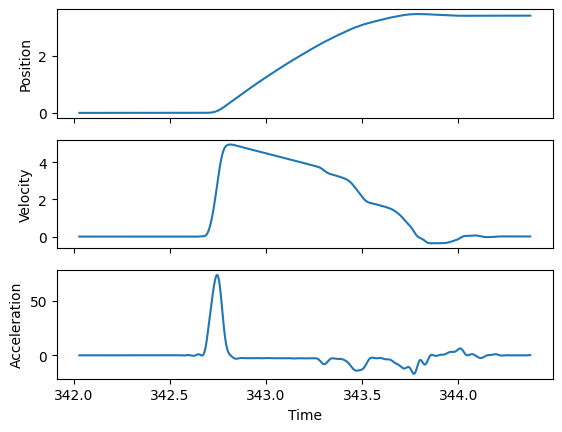

In [54]:
# Smoothing the wheel trace
# When using the sessionloader the wheel trace is automatically smoothed and the velocity and acceleration computed

# Get the interval for the 100th trial
t0 = sl.trials['intervals_0'][100]
t1 = sl.trials['intervals_1'][100]
idx = np.searchsorted(sl.wheel['times'], np.r_[t0, t1])

import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['position'][idx[0]:idx[1]] - sl.wheel['position'][idx[0]]) # subtract first position point
axs[0].set_ylabel('Position')
axs[1].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['velocity'][idx[0]:idx[1]])
axs[1].set_ylabel('Velocity')
axs[2].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['acceleration'][idx[0]:idx[1]])
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Acceleration')

Text(0.5, 0, 'Time')

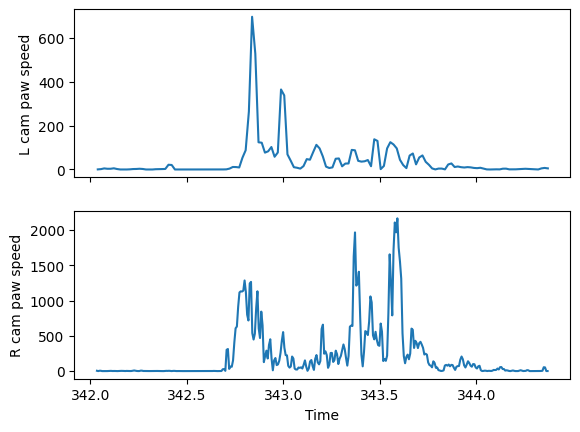

In [55]:
# Plot the paw trace for a given trial

# compute the paw speed for left and right camera (note 'paw_r' is always the paw closest to the camera)
from brainbox.behavior.dlc import get_speed
paw_left_speed = get_speed(sl.pose['leftCamera'],sl.pose['leftCamera']['times'], camera='left', feature='paw_r')
paw_right_speed = get_speed(sl.pose['rightCamera'],sl.pose['rightCamera']['times'], camera='right', feature='paw_r')

# left camera
idx_left = np.searchsorted(sl.pose['leftCamera']['times'], np.r_[t0, t1])
# right camera
idx_right = np.searchsorted(sl.pose['rightCamera']['times'], np.r_[t0, t1])

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(sl.pose['leftCamera']['times'][idx_left[0]:idx_left[1]], paw_left_speed[idx_left[0]:idx_left[1]])
axs[0].set_ylabel('L cam paw speed')
axs[1].plot(sl.pose['rightCamera']['times'][idx_right[0]:idx_right[1]], paw_right_speed[idx_right[0]:idx_right[1]])
axs[1].set_ylabel('R cam paw speed')
axs[1].set_xlabel('Time')

/usr/local/lib/python3.10/dist-packages/brainbox/singlecell.py:48: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ts = np.repeat(align_times[:, np.newaxis], tscale.size, axis=1) + tscale


Text(0, 0.5, 'Paw velocity')

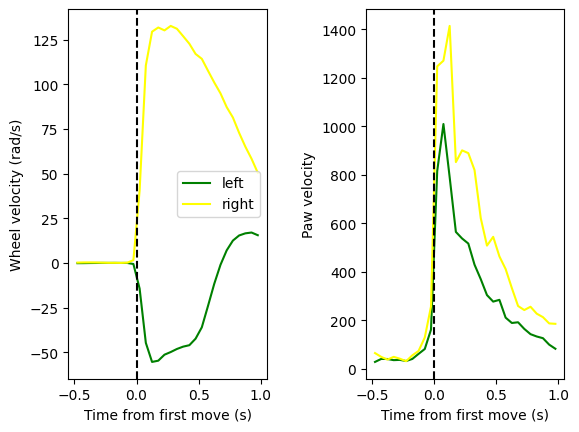

In [56]:
# Compute and plot the average wheel and paw trace for all trials
# Find times when first move is detected
events = sl.trials['firstMovement_times']

from brainbox.singlecell import bin_spikes
# Compute raster of wheel in 0.05s bins between 0.5s before the first move is detected to 1s after the first move is detected
bin_size = 0.05
pre_time = 0.5
post_time = 1
wheel_raster, times = bin_spikes(sl.wheel['times'], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size, weights=sl.wheel['velocity'])
paw_raster, times = bin_spikes(sl.pose['leftCamera']['times'], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size, weights=paw_left_speed)

left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
wheel_psth_left = np.nanmean(wheel_raster[left_idx], axis=0)
wheel_psth_right = np.nanmean(wheel_raster[right_idx], axis=0)
paw_psth_left = np.nanmean(paw_raster[left_idx], axis=0)
paw_psth_right = np.nanmean(paw_raster[right_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 0.5})
axs[0].plot(times, wheel_psth_left, c='green')
axs[0].plot(times, wheel_psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from first move (s)')
axs[0].set_ylabel('Wheel velocity (rad/s)')

axs[1].plot(times, paw_psth_left, c='green')
axs[1].plot(times, paw_psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from first move (s)')
axs[1].set_ylabel('Paw velocity')


### Example 5: Aggregating cluster data across insertions

In this example we will show how to

1.   Search for insertions passing through a chosen brain area
2.   Load in relevant data for each insertion to create a table containing cluster amplitude and brain location
3.   Download a clusters table for all BWM data
2.   Aggregate features across regions
3.   Plot features on atlas slices


In [57]:
# Search for insertions passing through a chosen brain area

from one.api import ONE
from ibllib.atlas import AllenAtlas
import pandas as pd
one = ONE()
ba = AllenAtlas()

acronym = 'VPL'
insertions = one.search_insertions(atlas_acronym=acronym, query_type='remote')
print(f'No. of insertions in {acronym}: {len(insertions)}')

No. of insertions in VPL: 22


In [58]:
# Load in relevant data for each insertion to create a table containing cluster amplitude and brain location

all_clusters = []
for pid in insertions:
  eid, name = one.pid2eid(pid)
  # Load in clusters data that we need, amps and channels attributes
  clusters = one.load_object(eid, 'clusters', attribute=['amps', 'channels'], collection=f'alf/{name}/pykilosort')
  # Load in channels data that we need. This gives the Allen CCF location of each channel
  channels_atlas_id = one.load_dataset(eid, 'channels.brainLocationIds_ccf_2017', collection=f'alf/{name}/pykilosort')
  # Use channels_atlas_id and clusters.channels to compute the atlas_id of each cluster
  clusters['atlas_ids'] = channels_atlas_id[clusters['channels']]
  # Use regions object to convert atlas ids to acronyms
  clusters['acronyms'] = ba.regions.id2acronym(clusters['atlas_ids'])
  # Convert clusters object to pandas dataframe and add the pid as a column
  clusters_df = clusters.to_df()
  clusters_df['pid'] = pid
  # Append table from individual pid to list
  all_clusters.append(clusters_df)


# concatenate into one big table
all_clusters = pd.concat(all_clusters)

/root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0019/2022-05-03/001/alf/probe00/pykilosort/clusters.channels.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 21.7kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0019/2022-05-03/001/alf/probe00/pykilosort/clusters.amps.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 19.8kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0019/2022-05-03/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 18.0kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA034/2022-01-28/001/alf/probe00/pykilosort/clusters.channels.npy: 100%|██████████| 7.30k/7.30k [00:00<00:00, 39.3kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA034/2022-01-28/001/alf/probe00/pykilosort/clusters.amps.npy: 100%|██████████| 7.30k/7.30k [00:00<0

In [59]:
# display the table
from IPython.display import display # import module to display dataframe nicely
display(all_clusters)

,channels,amps,atlas_ids,acronyms,pid
0,0,0.000052,194,LHA,335d689e-4d98-4532-b01b-7f7da89863c4
1,1,0.000056,194,LHA,335d689e-4d98-4532-b01b-7f7da89863c4
2,5,0.000061,194,LHA,335d689e-4d98-4532-b01b-7f7da89863c4
3,7,0.000053,194,LHA,335d689e-4d98-4532-b01b-7f7da89863c4
4,9,0.000084,194,LHA,335d689e-4d98-4532-b01b-7f7da89863c4
...,...,...,...,...,...
1584,275,0.000101,733,VPM,e8129a86-b5a9-4d2e-9e9c-09689c9bf0b3
1585,279,0.000086,733,VPM,e8129a86-b5a9-4d2e-9e9c-09689c9bf0b3
1586,318,0.000100,733,VPM,e8129a86-b5a9-4d2e-9e9c-09689c9bf0b3
1587,327,0.000083,733,VPM,e8129a86-b5a9-4d2e-9e9c-09689c9bf0b3


In [60]:
# Download a clusters table from all BWM data

# In step 2. of this example showed how we can build our own clusters table using insertions we are interested in.
# As part of the brainwide-map a table containing all clusters from the brain-wide map dataset has been released.
# This can be downloaded and loaded as shown below

from one.remote import aws
s3, bucket_name = aws.get_s3_from_alyx(alyx=one.alyx)

# Define where the table will be saved
table_path = one.cache_dir.joinpath('bwm_features', 'clusters_table.pqt')
# Download the table
aws.s3_download_file("aggregates/2022_Q4_IBL_et_al_BWM/clusters.pqt", table_path, s3=s3, bucket_name=bucket_name)

# Load in the file as a pandas table
clusters_table = pd.read_parquet(table_path)

# Display the table
display(clusters_table)

/root/Downloads/ONE/openalyx.internationalbrainlab.org/bwm_features/clusters_table.pqt: 100%|██████████| 41.2M/41.2M [00:01<00:00, 37.9MB/s]


,uuids,depths,channels,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,...,label,x,y,z,acronym,atlas_id,axial_um,lateral_um,pid,eid
0,918eb59c-2d17-4b4e-bbd2-7946d3604d2f,20.0,0,0,0.000520,0.000118,0.000186,2.231017,0.083911,0.072965,...,0.666667,-0.002289,-0.002537,-0.003595,TH,549,20.0,43.0,56f2a378-78d2-4132-b3c8-8c1ba82be598,6713a4a7-faed-4df2-acab-ee4e63326f8d
1,83a77b50-f409-4c3f-b992-782ebde32dbb,20.0,0,1,0.000369,0.000086,0.000162,1.829977,0.054216,0.043135,...,1.000000,-0.002289,-0.002537,-0.003595,TH,549,20.0,43.0,56f2a378-78d2-4132-b3c8-8c1ba82be598,6713a4a7-faed-4df2-acab-ee4e63326f8d
2,b4f7da58-9bf6-494e-a4cb-8d6934dcc928,20.0,0,2,0.000450,0.000143,0.000187,1.949605,0.436803,0.310567,...,0.333333,-0.002289,-0.002537,-0.003595,TH,549,20.0,43.0,56f2a378-78d2-4132-b3c8-8c1ba82be598,6713a4a7-faed-4df2-acab-ee4e63326f8d
3,8db87ffd-bea0-481e-91cb-8317b8da1563,20.0,0,3,0.000459,0.000162,0.000181,1.487011,0.141639,0.118156,...,1.000000,-0.002289,-0.002537,-0.003595,TH,549,20.0,43.0,56f2a378-78d2-4132-b3c8-8c1ba82be598,6713a4a7-faed-4df2-acab-ee4e63326f8d
4,3a2f08b3-0459-48ba-81fa-1d87a1086b62,20.0,0,4,0.000219,0.000130,0.000147,0.968083,0.000000,0.000000,...,0.666667,-0.002289,-0.002537,-0.003595,TH,549,20.0,43.0,56f2a378-78d2-4132-b3c8-8c1ba82be598,6713a4a7-faed-4df2-acab-ee4e63326f8d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295496,1df2371e-41e1-4bcc-a0b2-3dc1cb8d2d5b,700.0,69,725,0.000236,0.000125,0.000137,0.999767,0.000000,0.000000,...,0.333333,-0.001327,-0.000638,-0.003311,AV,255,700.0,11.0,79f44ba1-c931-4346-82eb-f628a9374045,c7bd79c9-c47e-4ea5-aea3-74dda991b48e
295497,dfa4b4d4-f181-4c85-947a-b150cb0eb2bd,2540.0,253,726,0.000195,0.000064,0.000109,1.786847,0.325005,0.242793,...,0.666667,-0.001903,-0.000650,-0.001372,SSp-ll6a,478,2540.0,11.0,79f44ba1-c931-4346-82eb-f628a9374045,c7bd79c9-c47e-4ea5-aea3-74dda991b48e
295498,7a440514-3206-4c9e-b0f9-7bde14fd6f0f,2560.0,255,727,0.000259,0.000078,0.000176,2.522561,0.000000,0.000000,...,0.666667,-0.001910,-0.000650,-0.001349,SSp-ll6a,478,2560.0,27.0,79f44ba1-c931-4346-82eb-f628a9374045,c7bd79c9-c47e-4ea5-aea3-74dda991b48e
295499,aa971667-5bb1-421a-8dcc-d53aa0797e09,2860.0,285,728,0.000279,0.000144,0.000155,0.866324,0.000000,0.000000,...,0.666667,-0.001995,-0.000616,-0.001020,SSp-ll5,1128,2860.0,11.0,79f44ba1-c931-4346-82eb-f628a9374045,c7bd79c9-c47e-4ea5-aea3-74dda991b48e


In [61]:
# Aggregate features across regions

# Restrict table to just good clusters
clusters_table = clusters_table[clusters_table['label'] == 1]

# Group the pandas table by region acronyms
regions = clusters_table.groupby('acronym')

# Find the mean firing rate per region
fr_region = regions.firing_rate.mean()

# Get out the values as arrays, the acronyms are stored in the index of the table
# and the mean firing rate as a column
acronyms = fr_region.index.values
fr = fr_region.values

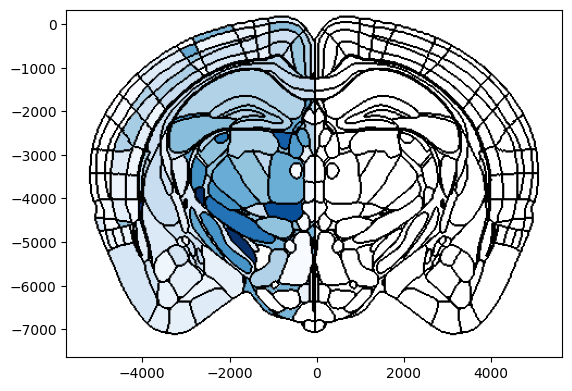

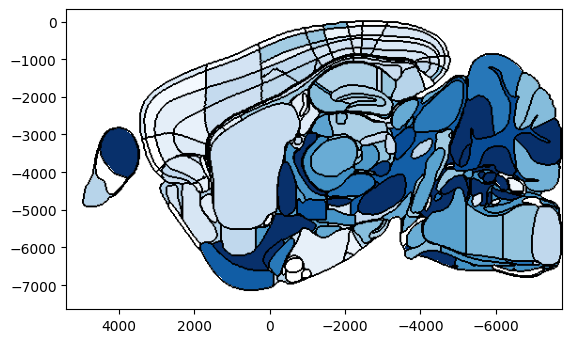

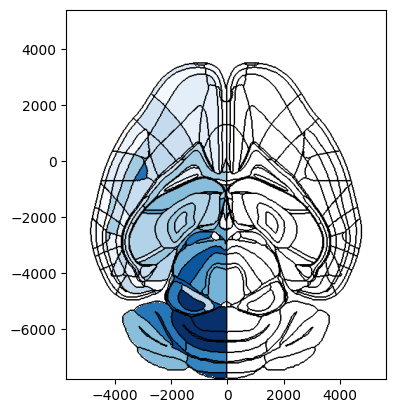

In [62]:
# Plot features on atlas slices

# import ibllib atlas module
from ibllib.atlas.plots import plot_scalar_on_slice
from ibllib.atlas import AllenAtlas
import numpy as np
ba = AllenAtlas()

# compute colormap levels
levels = np.nanquantile(fr, [0.1, 0.9])

# plot coronal slice at -2000 um from bregma
fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='coronal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# plot sagittal slice at -2000 um from bregma
fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='sagittal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# plot horizontl slice at -2000 um from bregma
fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='horizontal', background='boundary', cmap='Blues', clevels=levels, ba=ba)